**Name:**
1.   Krittin Nisunarat 6280782
2.   Khwanchanok Chaichanayothinwatchara 6280164
3.   Vanessa Rujipatanakul 6280204
4.   Pornkamol Luthra 6280012

### Happiness vs. Corruption

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
happiness_df = pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')
happiness_df = happiness_df.drop(columns=['family', 'dystopia_residual'])
social_support_df = happiness_df[happiness_df['Year'] > 2016].replace(0, np.nan).dropna()
no_social_support_df = happiness_df.drop(columns=['social_support']).replace(0, np.nan).dropna()

### Find correlation between dataset

In [30]:
def find_coorelation(df):
    corr = df.corr()
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    for column in corr.columns:
        corr[column][column] = 0.0
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return corr

/var/folders/vr/6l9k0t7n045f_gx40s7flt380000gn/T/ipykernel_45452/953548275.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


happiness_score     0.531788
gdp_per_capita      0.357057
health              0.376948
freedom             0.000000
generosity          0.304255
government_trust    0.444022
Year                0.194106
social_support      0.382051
cpi_score           0.456638
Name: freedom, dtype: float64

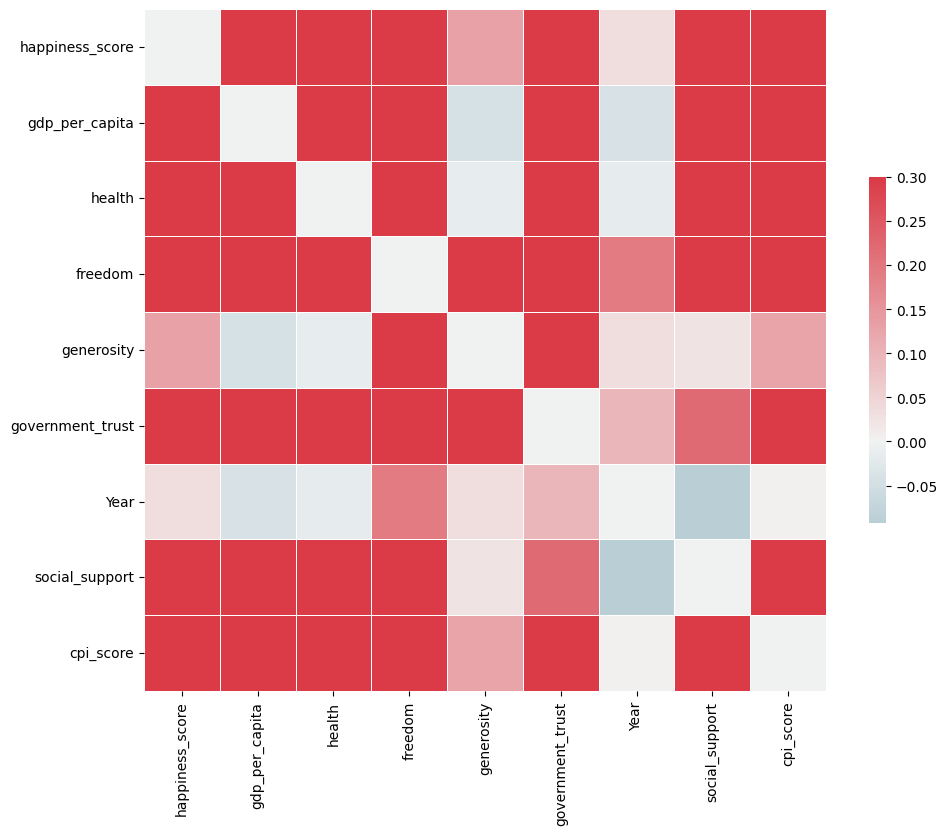

In [34]:
# With social support
find_coorelation(social_support_df)['freedom']

/var/folders/vr/6l9k0t7n045f_gx40s7flt380000gn/T/ipykernel_45452/3594420530.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,happiness_score,gdp_per_capita,health,freedom,generosity,government_trust,Year,cpi_score
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.429188,0.368910,0.372571,0.327798,0.095256,0.317878,0.007631,0.415764
std,0.326688,0.357800,0.331301,0.199150,0.149059,0.216194,0.057938,0.308656
min,0.000000,-0.028932,-0.016377,0.000000,-0.106708,0.000000,-0.106708,0.000000
25%,0.122725,-0.002779,0.058155,0.235170,-0.012433,0.215854,-0.007233,0.128225
50%,0.500679,0.359708,0.368282,0.382209,0.076784,0.345781,0.011759,0.555711
75%,0.708464,0.720986,0.677109,0.472899,0.198150,0.458976,0.039005,0.659309
max,0.795855,0.795855,0.772122,0.545431,0.291749,0.624193,0.077540,0.703940


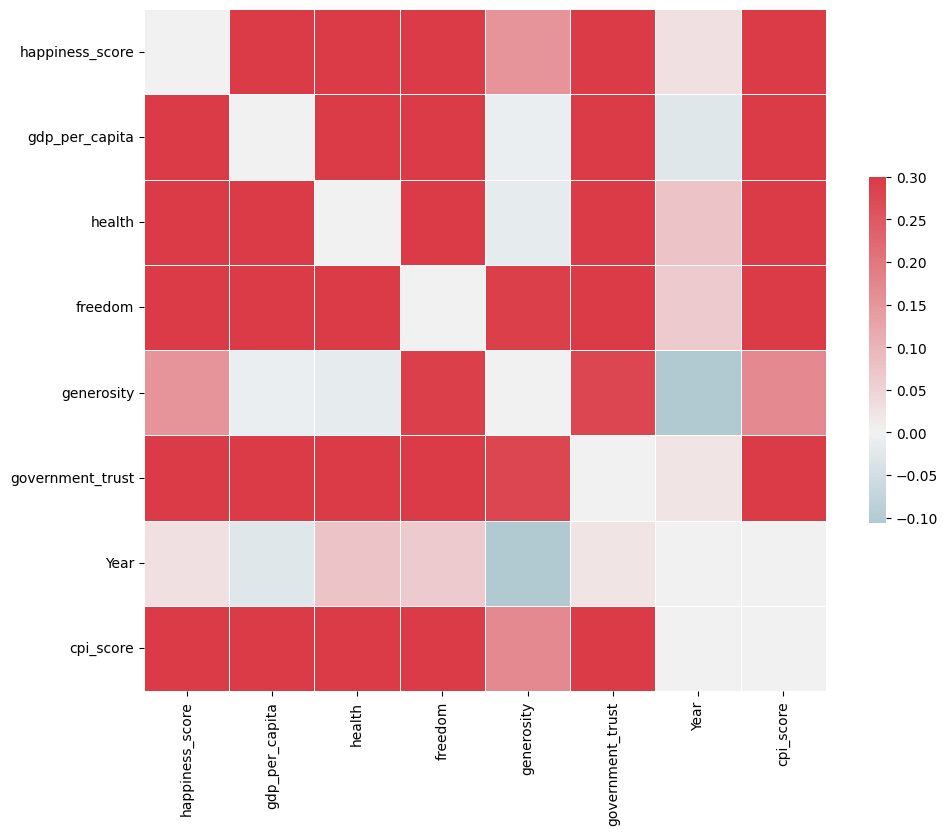

In [5]:
# Without social support
find_coorelation(no_social_support_df)

### GDP Per Capita vs Generosity
**Interested Question:** Is there any significant correlation between generosity and gdp per capita? 

### GDP Per Capita vs Health
**Interested Question:** How does GDP per capita impact health?

### Freedom vs. Government Trust
**Interested Question:** How does the freedom citizen have affect the trust in government?

### Health vs Social Support
**Interested Question:** Does social support improve our health?

### CPI Score vs Government Trust
**Interested Question:** How does each country's cpi score impact citizen's trust in government?

In [6]:
cpi = happiness_df.groupby('Country')['cpi_score'].mean()
gov = happiness_df.groupby('Country')['government_trust'].mean()
continent = happiness_df.groupby('Country')['continent'].max()
cpi_gov_df = pd.concat([cpi, gov, continent], axis=1)

In [7]:
def exponential_curve_fit(x, a, b, c):
    return a*x**2 + b*x + c

fitted_model, _ = curve_fit(exponential_curve_fit,xdata=cpi_gov_df['cpi_score'],ydata=cpi_gov_df['government_trust'])
fitted_model

array([ 1.32196889e-04, -1.02360893e-02,  2.69906524e-01])

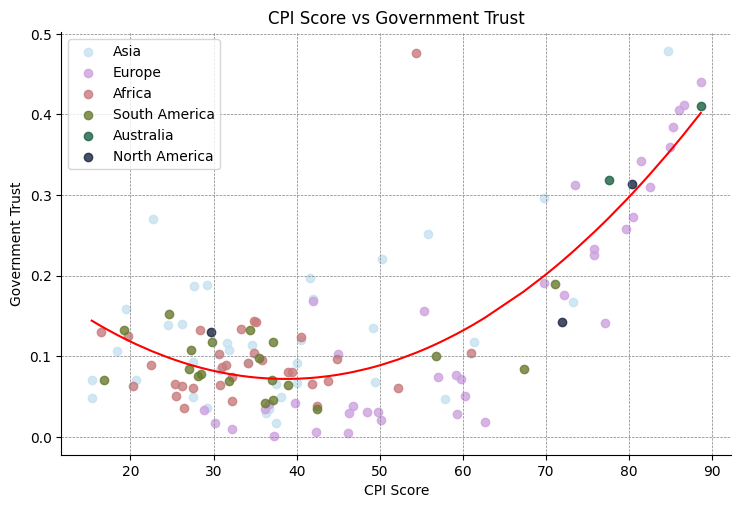

In [25]:
xs = cpi_gov_df['cpi_score'].sort_values()
t = sns.lmplot(data=cpi_gov_df,x='cpi_score', y='government_trust',hue='continent', palette='cubehelix_r',legend=False, fit_reg=False)
sns.lineplot(x=xs, y=exponential_curve_fit(xs, *fitted_model),color='red')
plt.grid(color='gray', linestyle='--', lw=0.5)
plt.xlabel('CPI Score')
plt.ylabel('Government Trust')
plt.title('CPI Score vs Government Trust')
t.fig.set_figwidth(8)